In [ ]:
#obtained this file from ../qbb2020/day1/1-morning

# Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load K4me3.bed

In [2]:
bed_columns = ["chr", "start", "end"]
df_k4 = pd.read_table( "../../qbb2020/data/K4me3.bed", names=bed_columns )
df_k4

,chr,start,end
0,3L,15823270,15830715
1,2R,11451787,11459612
2,3R,21665759,21673392
3,2R,20324929,20331038
4,3R,19859679,19864278
...,...,...,...
3825,3R,565835,566082
3826,2L,10439373,10442085
3827,3R,4477321,4479529
3828,3L,711347,711871


In [3]:
type( df_k4 )

pandas.core.frame.DataFrame

# Work with data frames

In [4]:
df_k4.columns

Index(['chr', 'start', 'end'], dtype='object')

In [5]:
df_k4.index

RangeIndex(start=0, stop=3830, step=1)

In [6]:
df_k4.values

array([['3L', 15823270, 15830715],
       ['2R', 11451787, 11459612],
       ['3R', 21665759, 21673392],
       ...,
       ['3R', 4477321, 4479529],
       ['3L', 711347, 711871],
       ['2L', 6792695, 6795077]], dtype=object)

In [7]:
df_k4.shape

(3830, 3)

In [8]:
df_k4.loc[0,"chr"]

'3L'

In [9]:
df_k4.loc[:,"chr"]

0       3L
1       2R
2       3R
3       2R
4       3R
        ..
3825    3R
3826    2L
3827    3R
3828    3L
3829    2L
Name: chr, Length: 3830, dtype: object

# Chromosomes

## Demo

In [10]:
chr_k4 = df_k4.loc[:,"chr"]
chr_k4 = chr_k4.value_counts()
chr_k4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

In [11]:
type( chr_k4 )

pandas.core.series.Series

In [12]:
chr_k4.shape

(8,)

In [13]:
chr_k4.loc["2L"]

713

In [14]:
coi = ["2L", "2R"]
chr_k4.loc[ coi ]

2L    713
2R    799
Name: chr, dtype: int64

In [15]:
chr_k4.index

Index(['3R', '2R', '3L', '2L', 'X', '4', 'Y', 'Y_CP007111v1_random'], dtype='object')

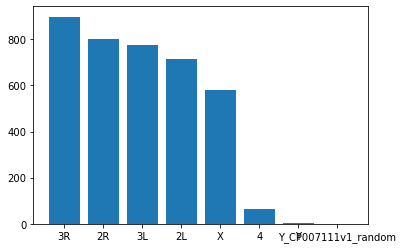

In [16]:
fig, ax = plt.subplots()
ax.bar( chr_k4.index, chr_k4 )
plt.show()

## Question 1: Tidy up K4

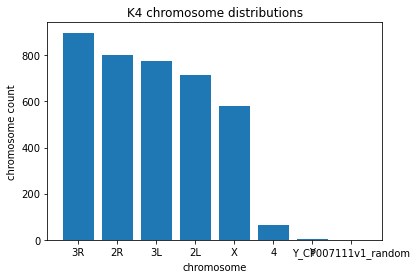

In [27]:
#what do you mean by plot chromosomes in order
fig, ax = plt.subplots()
ax.bar( chr_k4.index, chr_k4)
ax.title.set_text("K4 chromosome distributions")
ax.set_xlabel("chromosome")
ax.set_ylabel("chromosome count")
plt.show()

## Question 2: Subplot K9 K27

In [32]:
#obtain dataframe of k9/k27 chromosome data because k4 has already been done
df_k9 = pd.read_table( "../../qbb2020/data/K9me3.bed", names=bed_columns )
df_k27 = pd.read_table( "../../qbb2020/data/K27me3.bed", names=bed_columns )

In [44]:
#get the chromosome distribution counts for k9/k27
chr_k4 = df_k4.loc[:,"chr"]
chr_k4 = chr_k4.value_counts()
chr_k4

chr_k9 = df_k9.loc[:,"chr"]
chr_k9 = chr_k9.value_counts()
chr_k9

chr_k27 = df_k27.loc[:,"chr"]
chr_k27 = chr_k27.value_counts()
chr_k27

2R               102
3R                90
3L                89
2L                80
X                 64
4                  5
Un_CP007080v1      1
Name: chr, dtype: int64

In [ ]:
#These exercises only make sense to people with some computational background

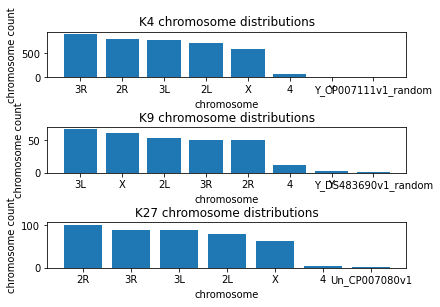

In [77]:
#plot k4/k9/k27 on same plot as subplots
fig, ax = plt.subplots(3)
ax[0].bar( chr_k4.index, chr_k4)
ax[0].title.set_text("K4 chromosome distributions")
ax[0].set_xlabel("chromosome")
ax[0].set_ylabel("chromosome count")
ax[1].bar(chr_k9.index, chr_k9)
ax[1].title.set_text("K9 chromosome distributions")
ax[1].set_xlabel("chromosome")
ax[1].set_ylabel("chromosome count")
ax[2].bar(chr_k27.index, chr_k27)
ax[2].title.set_text("K27 chromosome distributions")
ax[2].set_xlabel("chromosome")
ax[2].set_ylabel("chromosome count")
fig.tight_layout(pad=0.2)
plt.show()


# Widths

## Demo

In [59]:
df_k4.loc[:,"width"] = df_k4.loc[:,"end"] - df_k4.loc[:,"start"]
df_k4

,chr,start,end,width
0,3L,15823270,15830715,7445
1,2R,11451787,11459612,7825
2,3R,21665759,21673392,7633
3,2R,20324929,20331038,6109
4,3R,19859679,19864278,4599
...,...,...,...,...
3825,3R,565835,566082,247
3826,2L,10439373,10442085,2712
3827,3R,4477321,4479529,2208
3828,3L,711347,711871,524


In [60]:
df_k4.describe()

,start,end,width
count,3.830000e+03,3.830000e+03,3830.000000
mean,1.232288e+07,1.232466e+07,1779.086684
std,7.711626e+06,7.711810e+06,1927.396833
min,5.082000e+03,6.616000e+03,1.000000
25%,6.069285e+06,6.070038e+06,388.250000
50%,1.128937e+07,1.128951e+07,1114.000000
75%,1.828572e+07,1.828875e+07,2389.000000
max,3.206773e+07,3.206836e+07,15877.000000


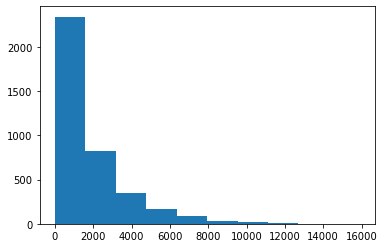

In [61]:
fig, ax = plt.subplots()
ax.hist( df_k4.loc[:,"width"] )
plt.show()

In [69]:
#already obtained all dataframes in line 32
#add width to those dataframes
def add_width(df_k):
    df_k.loc[:,"width"] = df_k.loc[:,"end"] - df_k.loc[:,"start"]
    return(df_k)

df_k9_width = add_width(df_k9)
df_k9_width

df_k27_width = add_width(df_k27)
df_k27_width

,chr,start,end,width
0,2L,5037,9637,4600
1,2L,322173,326237,4064
2,2L,365873,398837,32964
3,2L,498973,547373,48400
4,2L,579973,608037,28064
...,...,...,...,...
426,X,20310691,20388555,77864
427,X,20534591,20759055,224464
428,X,20824191,20835255,11064
429,X,20924791,20953755,28964


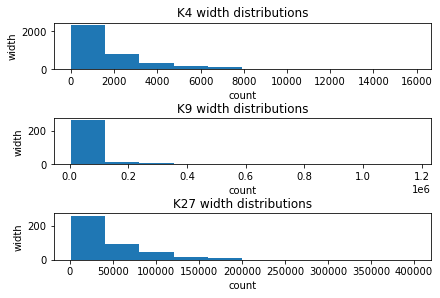

In [79]:
#plot width distributions
fig, ax = plt.subplots(3)
ax[0].hist( df_k4.loc[:,"width"] )
ax[0].title.set_text("K4 width distributions")
ax[0].set_xlabel("count")
ax[0].set_ylabel("width")
ax[1].hist( df_k9.loc[:,"width"] )
ax[1].title.set_text("K9 width distributions")
ax[1].set_xlabel("count")
ax[1].set_ylabel("width")
ax[2].hist( df_k27.loc[:,"width"] )
ax[2].title.set_text("K27 width distributions")
ax[2].set_xlabel("count")
ax[2].set_ylabel("width")
fig.tight_layout(pad=0.2)
plt.show()